<img src="https://news.illinois.edu/files/6367/543635/116641.jpg" alt="University of Illinois" width="250"/>

# 35_YQDPW_1 (UIUC) competition code #
By Thihan Moe Kyaw
* <tkyaw2@illinois.edu>

# Description of the Competition

A large restaurant chain owns restaurants located along major highways. The average revenue of a restaurant located at distance 𝑥 from the highway is 𝑅(𝑥). For simplicity, the variable distance to the highway is normalized to be in the interval [1,2]. The function 𝑅(𝑥) is unknown. The goal of this competition is to predict the value of 𝑅(𝑥) for several values of distances to the highway. Currently, the restaurant chain is located at 40 different locations. You will have access to
$ {(𝑥𝑖,𝑅(𝑥𝑖))}^{30}_{𝑖=1} $ , i.e., the distance to the highway and average revenue for 30 of these restaurants. Using these data, you must submit a prediction of average revenue for the remaining 10 restaurants, using their distances to the highway.

You will find the necessary datasets in the Data tab. You can send up to 10 different submissions each day until the end of the competition. The deadline of the competition is Sunday September 26th at 23:59:59.



### imports and graphics configurations ###

In [ ]:
import os
import numpy
import pandas
import time
import random
import matplotlib
import operator
#%matplotlib notebook
import matplotlib.pyplot as plt
import matplotlib.ticker as mtick
import scipy.stats
#from pandas.plotting import autocorrelation_plot
import matplotlib.offsetbox as offsetbox
from matplotlib.ticker import StrMethodFormatter
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import PolynomialFeatures

import imageio
import PIL

def saver(fname):
    plt.savefig(fname+".png",bbox_inches="tight")
    
def legend(pos="bottom",ncol=3,extra=False):
    if pos=="bottom":
        extra = 0.15 if extra else 0
        plt.legend(bbox_to_anchor=(0.5,-0.2-extra), loc='upper center',facecolor="lightgray",ncol=ncol)
    elif pos=="side":
        plt.legend(bbox_to_anchor=(1.1,0.5), loc='center left',facecolor="lightgray",ncol=1)
        
def textbox(txt,fname=None):
    plt.figure(figsize=(1,1))
    plt.gca().add_artist(offsetbox.AnchoredText("\n".join(txt), loc="center",prop=dict(size=30)))
    plt.axis('off')
    if fname is not None:
        saver(fname)
    plt.show()
    plt.close()

In [ ]:
params={
    "font.size":15,
    "lines.linewidth":5
}
plt.rcParams.update(params)

In [ ]:
pngfiles=[f for f in os.listdir(".") if f.endswith(".png")]
print("existing png files: "+str(pngfiles))
#print([os.remove(f) for f in pngfiles])

existing png files: []


In [ ]:
def getfile(location_pair,**kwargs): #tries to get local version and then defaults to google drive version
    (loc,gdrive)=location_pair
    try:
        out=pandas.read_csv(loc,**kwargs)
    except FileNotFoundError:
        print("local file not found; accessing Google Drive")
        loc = 'https://drive.google.com/uc?export=download&id='+gdrive.split('/')[-2]
        out=pandas.read_csv(loc,**kwargs)
    return out

In [ ]:
url_train ="https://www.kaggle.com/c/35-yqdpw-1-uiuc/data?select=train_35_YQDPW_1.csv"
fname_train=("train_35_YQDPW_1.csv","https://drive.google.com/file/d/1Ps4SYA-BJhZELx8_duvs1B2ExDF2aYXr/view?usp=sharing")
plot_title_train ="Revenue of each restaurant"
data_color_train ="red"
markersize=2
thinlinesize=2
textboxsize=(5,0.5)

url_test ="https://www.kaggle.com/c/35-yqdpw-1-uiuc/data?select=test_35_YQDPW_1.csv"
fname_test=("test_35_YQDPW_1.csv","https://drive.google.com/file/d/1QuPOMihjCNK804crx0aQsMhQIoWZEXCb/view?usp=sharing")
plot_title_test ="Revenue of each restaurant"
data_color_test= "blue"
markersize=2
thinlinesize=2
textboxsize=(5,0.5)

### load data ###

In [ ]:
data_raw_test = getfile(fname_test)
data_raw_train = getfile(fname_train)

local file not found; accessing Google Drive
local file not found; accessing Google Drive


In [ ]:
data_raw_test.head()

,x
0,1.088136
1,1.091455
2,1.110336
3,1.119733
4,1.141716


In [ ]:
data_raw_train.head()

,x,R
0,1.018432,36.75121
1,1.025323,36.82063
2,1.049203,36.68162
3,1.051312,35.85892
4,1.057825,36.37699


In [ ]:
(feature,label)=("x","R")
data_train = data_raw_train.copy()
data_train.index+=1
data_train.index.name="record number"
XY=data_train[[feature,label]].dropna(axis='index')
X=XY[feature].squeeze()
Y=XY[label].squeeze()

data_test = data_raw_test.copy()
data_test.index+=1
data_test.index.name="record number"
X_test=data_test[feature].dropna(axis='index')
print(X_test)
# X_test=XY_test[feature].squeeze()

record number
1     1.088136
2     1.091455
3     1.110336
4     1.119733
5     1.141716
6     1.388930
7     1.393720
8     1.610129
9     1.632896
10    1.657423
Name: x, dtype: float64


In [ ]:
data_train.head(1).transpose().to_latex(buf="sample_data.tex",bold_rows=True)

NameError: ignored

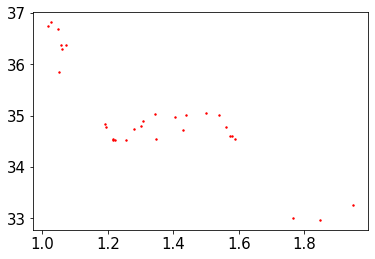

In [ ]:
plt.figure()
plt.scatter(X,Y,color=data_color_train,s=markersize)
title=[]
title.append(plot_title)
plt.title("\n".join(title))
plt.xlabel("distance from the highway ({0:s})".format(feature))
plt.ylabel("Revenue of a restaurant ({0:s})".format(label))
#tick = mtick.StrMethodFormatter("${x:,.0f}")
#plt.gca().yaxis.set_major_formatter(tick) 
saver("xyplot")
plt.show()
plt.close()

# Try linear regression

In [ ]:
m_opt,b_opt,_,_,_=scipy.stats.linregress(X,Y)
print("m_opt = {0:} and b_opt= {1:}".format(m_opt,b_opt))

m_opt_train,b_opt_train,_,_,_=scipy.stats.linregress(X,Y)
print("m_opt_train = {0:} and b_opt_train= {1:}".format(m_opt_train,b_opt_train))
corcoeff=numpy.corrcoef(X,Y)

m_opt = -3.2970469100211433 and b_opt= 39.421153704139954
m_opt_train = -3.2970469100211433 and b_opt_train= 39.421153704139954


NameError: ignored

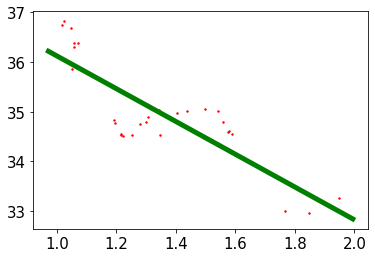

In [ ]:
plt.figure()
plt.scatter(X,Y,color=data_color_train,s=markersize)
x_range=numpy.array(plt.xlim())
y_range=numpy.array(plt.ylim())
plt.plot(x_range,m_opt_train*x_range + b_opt_train,color="green",label=r"$y=\rho x$ + b")
title=[]
title.append(plot_title)
title.append("normalized data")
plt.title("\n".join(title))
plt.xlabel("x ({0:s})".format(feature))
plt.ylabel("y ({0:s})".format(label))
legend("bottom")
saver("xyplot_scored_line")
plt.show()
plt.close()

### Try polinomial regression of degree n ###

In [ ]:
x = X[:, numpy.newaxis]
x_test = X_test[:, numpy.newaxis]
y = Y[:, numpy.newaxis]

# To work on at free time
# tot_poly_reg = 10
# for i in range(len(tot_poly_reg)+1):
#   if i > 0:
#     polynomial_features= PolynomialFeatures(degree=i)
#     exec(f'x_poly_{i} = polynomial_features.fit_transform(x)')
#     exec(f'model_{i} = LinearRegression()')
#     exec(f'model_{i}.fit(x_poly_{i}, y)')
#     exec(f'y_poly_pred_{i} = model_{i}.predict(x_poly_{i})')
#     exec(f'rmse_{i} = numpy.sqrt(mean_squared_error(y,y_poly_pred_{i}))')
#     exec(f'r2_{i}' = r2_score(y,y_poly_pred_{i})'')


#Degree 3 regression
polynomial_features= PolynomialFeatures(degree=3)
x_poly_3 = polynomial_features.fit_transform(x)

model_3 = LinearRegression()
model_3.fit(x_poly_3, y)
y_poly_3_pred = model_3.predict(x_poly_3)

#Degree 4 regression
polynomial_features= PolynomialFeatures(degree=4)
x_poly_4 = polynomial_features.fit_transform(x)

model_4 = LinearRegression()
model_4.fit(x_poly_4, y)
y_poly_4_pred = model_4.predict(x_poly_4)

#Degree 5 regression
polynomial_features= PolynomialFeatures(degree=5)
x_poly_5 = polynomial_features.fit_transform(x)

model_5 = LinearRegression()
model_5.fit(x_poly_5, y)
y_poly_5_pred = model_5.predict(x_poly_5)

#RMSE and R^2 score
rmse_3 = numpy.sqrt(mean_squared_error(y,y_poly_3_pred))
r2_3 = r2_score(y,y_poly_3_pred)
rmse_4 = numpy.sqrt(mean_squared_error(y,y_poly_4_pred))
r2_4 = r2_score(y,y_poly_4_pred)
rmse_5 = numpy.sqrt(mean_squared_error(y,y_poly_5_pred))
r2_5 = r2_score(y,y_poly_5_pred)

print("RSME for degree 3: ", rmse_3)
print("r2_3: ", r2_3)
print("RSME for degree 4: ", rmse_4)
print("r2_4: ", r2_4)
print("RSME for degree 5: ", rmse_5)
print("r2_5: ", r2_5)

RSME for degree 3:  0.3906312187127765
r2_3:  0.8391259055432996
RSME for degree 4:  0.20972098807728948
r2_4:  0.9536301160960933
RSME for degree 5:  0.1954348881466441
r2_5:  0.9597323386678207


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  """Entry point for launching an IPython kernel.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  This is separate from the ipykernel package so we can avoid doing imports until


### Use 4th degree regression and predict the R ###

In [ ]:
(feature,label)=("x","R")
#Degree 4 regression and using it on fit data
polynomial_features = PolynomialFeatures(degree=1)
x_poly_1 = polynomial_features.fit_transform(x)
x_test_poly_1 = polynomial_features.fit_transform(x_test)

model_1 = LinearRegression()
model_1.fit(x_poly_1, y)
y_predicted = model_1.predict(x_test_poly_1)

### Plot prediction ###

No handles with labels found to put in legend.


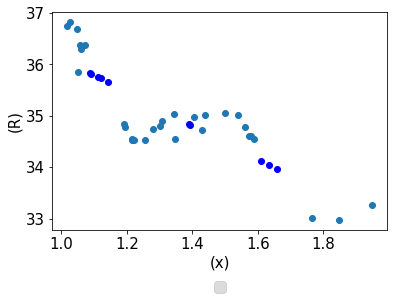

[[35.83351827]
 [35.82257537]
 [35.76032383]
 [35.72934148]
 [35.65686249]
 [34.84178634]
 [34.82599348]
 [34.11248286]
 [34.03741899]
 [33.95655232]]


In [ ]:
plt.scatter(x, y)
plt.scatter(x_test, y_predicted, color = "b")
# sort the values of x before line plot
sort_axis = operator.itemgetter(0)
# sorted_zip = sorted(zip(x_test,y_poly_4_pred), key=sort_axis)
#x, y_poly_pred = zip(*sorted_zip)
plt.xlabel("({0:s})".format(feature))
plt.ylabel("({0:s})".format(label))
# title=[]
# title.append(plot_title)
# plt.title("\n".join(title))
# plt.plot(x, y_poly_3_pred, label= "Regression using polynomial of degree 3", color='m')
# plt.plot(x, y_poly_4_pred, label= "Regression using polynomial of degree 4", color='r')
# plt.plot(x, y_poly_5_pred, label= "Regression using polynomial of degree 5", color='c')
legend("bottom")
plt.show()
plt.close()

print(y_predicted)

No handles with labels found to put in legend.


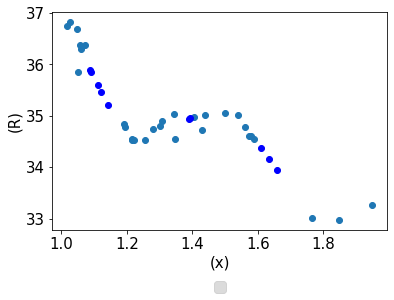

[[35.8955908 ]
 [35.84892693]
 [35.59093374]
 [35.46940586]
 [35.20998418]
 [34.94010995]
 [34.95472002]
 [34.36633517]
 [34.16456189]
 [33.93738375]]


In [ ]:
(feature,label)=("x","R")
#Degree 4 regression and using it on fit data
polynomial_features = PolynomialFeatures(degree=6)
x_poly_7 = polynomial_features.fit_transform(x)
x_test_poly_7 = polynomial_features.fit_transform(x_test)

model_7 = LinearRegression()
model_7.fit(x_poly_7, y)
y_predicted = model_7.predict(x_test_poly_7)


plt.scatter(x, y)
plt.scatter(x_test, y_predicted, color = "b")

# sort the values of x before line plot
sort_axis = operator.itemgetter(0)
# sorted_zip = sorted(zip(x_test,y_poly_4_pred), key=sort_axis)
#x, y_poly_pred = zip(*sorted_zip)
plt.xlabel("({0:s})".format(feature))
plt.ylabel("({0:s})".format(label))
# title=[]
# title.append(plot_title)
# plt.title("\n".join(title))
# plt.plot(x, y_poly_3_pred, label= "Regression using polynomial of degree 3", color='m')
# plt.plot(x, y_poly_4_pred, label= "Regression using polynomial of degree 4", color='r')
# plt.plot(x, y_poly_5_pred, label= "Regression using polynomial of degree 5", color='c')
legend("bottom")
plt.show()
plt.close()

print(y_predicted)

### Save prediction as csv

In [ ]:
(feature,label)=("x","R")
prediction_output = numpy.concatenate((numpy.round(data_test,decimals=6), y_predicted), axis=1)
# numpy.insert(prediction_output, 1, numpy.array((feature, label)), 0)
print(prediction_output)
numpy.savetxt(fname="predicted_value.csv", delimiter=",", X=prediction_output)

[[ 1.088136   35.8955908 ]
 [ 1.091455   35.84892693]
 [ 1.110336   35.59093374]
 [ 1.119733   35.46940586]
 [ 1.141716   35.20998418]
 [ 1.38893    34.94010995]
 [ 1.39372    34.95472002]
 [ 1.610129   34.36633517]
 [ 1.632896   34.16456189]
 [ 1.657423   33.93738375]]


In [ ]:
print(data_raw_train)

           x         R
0   1.018432  36.75121
1   1.025323  36.82063
2   1.049203  36.68162
3   1.051312  35.85892
4   1.057825  36.37699
5   1.059490  36.30272
6   1.072756  36.37304
7   1.192729  34.84151
8   1.195417  34.77208
9   1.216008  34.54561
10  1.216789  34.52916
11  1.222137  34.52203
12  1.254064  34.53405
13  1.278740  34.74977
14  1.301509  34.79375
15  1.306668  34.89475
16  1.344241  35.03592
17  1.346854  34.53998
18  1.403849  34.97194
19  1.428769  34.71441
20  1.438323  35.01768
21  1.499425  35.04974
22  1.540664  35.01926
23  1.560127  34.79006
24  1.574376  34.60011
25  1.578912  34.61308
26  1.588697  34.54656
27  1.766393  33.00447
28  1.847216  32.97239
29  1.948155  33.26190


In [ ]:
lin_data_raw_train = 